In [ ]:
%pip install numpy matplotlib scipy

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import epsilon_0, pi

In [65]:
k = 1 / (4 * pi * epsilon_0)

In [66]:
def electric_field(q, xq, yq, x, y):
    """ Calcula el campo electrico en los puntos (x, y) debido a las cargas q en (xq, yq) """
    Ex, Ey = np.zeros_like(x), np.zeros_like(y)
    
    for qi, xqi, yqi in zip(q, xq, yq):
        dx = x - xqi
        dy = y - yqi
        r3 = (dx**2 + dy**2)**1.5
        Ex += qi * dx / r3
        Ey += qi * dy / r3

    Ex *= k
    Ey *= k
    return Ex, Ey

In [67]:
def potential(q, xq, yq, x, y):
    """ Calcula el potencial electrico en los puntos (x, y) debido a las cargas q en (xq, yq) """
    V = np.zeros_like(x)
    
    for qi, xqi, yqi in zip(q, xq, yq):
        dx = x - xqi
        dy = y - yqi
        r = np.sqrt(dx**2 + dy**2)
        V += qi / r

    V *= k
    return V

In [68]:
x = np.linspace(-10, 10, 1000, endpoint=False)
y = np.linspace(-10, 10, 1000, endpoint=False)
X, Y = np.meshgrid(x, y)
x_axis_X, x_axis_Y = np.meshgrid(x, [.0])

q = [1e-6, 2e-6, -3e-6]
xq = [-5, 0, 5]
yq = [0, 0, 0]

Ex, Ey = electric_field(q, xq, yq, X, Y)
V = potential(q, xq, yq, X, Y)

Ex1, _ = electric_field([q[0]], [xq[0]], [yq[0]], x_axis_X, x_axis_Y)
Ex2, _ = electric_field([q[1]], [xq[1]], [yq[1]], x_axis_X, x_axis_Y)
Ex3, _ = electric_field([q[2]], [xq[2]], [yq[2]], x_axis_X, x_axis_Y)
x_axis_Ex = Ex1 + Ex2 + Ex3

V1 = potential([q[0]], [xq[0]], [yq[0]], x_axis_X, x_axis_Y)
V2 = potential([q[1]], [xq[1]], [yq[1]], x_axis_X, x_axis_Y)
V3 = potential([q[2]], [xq[2]], [yq[2]], x_axis_X, x_axis_Y)
x_axis_V = V1 + V2 + V3

C:\Users\juanb\AppData\Local\Temp\ipykernel_36216\848905729.py:9: RuntimeWarning: invalid value encountered in divide
  Ex += qi * dx / r3
C:\Users\juanb\AppData\Local\Temp\ipykernel_36216\848905729.py:10: RuntimeWarning: invalid value encountered in divide
  Ey += qi * dy / r3
C:\Users\juanb\AppData\Local\Temp\ipykernel_36216\3958471380.py:9: RuntimeWarning: divide by zero encountered in divide
  V += qi / r


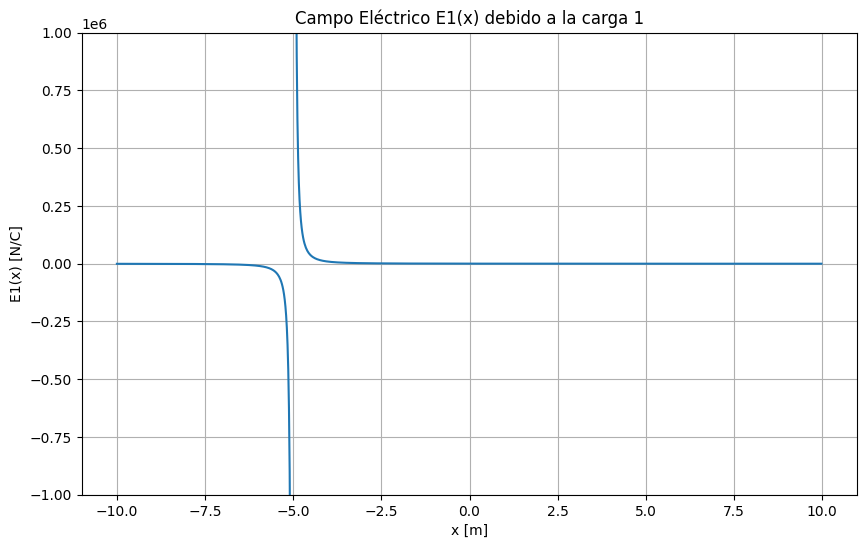

In [92]:
plt.figure(figsize=(10, 6))
plt.plot(x, Ex1[0, :])
plt.ylim(-1e6, 1e6)
plt.xlabel('x [m]')
plt.ylabel('E1(x) [N/C]')
plt.title('Campo Eléctrico E1(x) debido a la carga 1')
plt.grid()
plt.show()

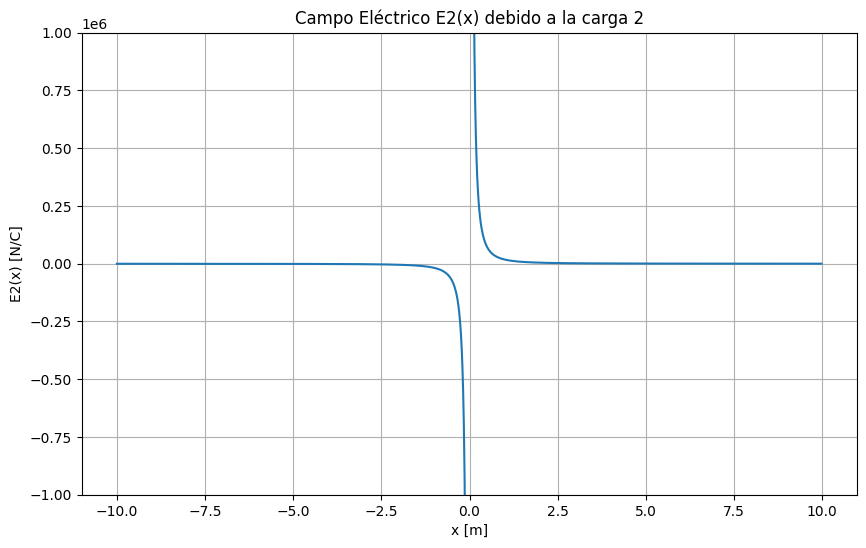

In [90]:
plt.figure(figsize=(10, 6))
plt.plot(x, Ex2[0, :])
plt.ylim(-1e6, 1e6)
plt.xlabel('x [m]')
plt.ylabel('E2(x) [N/C]')
plt.title('Campo Eléctrico E2(x) debido a la carga 2')
plt.grid()
plt.show()

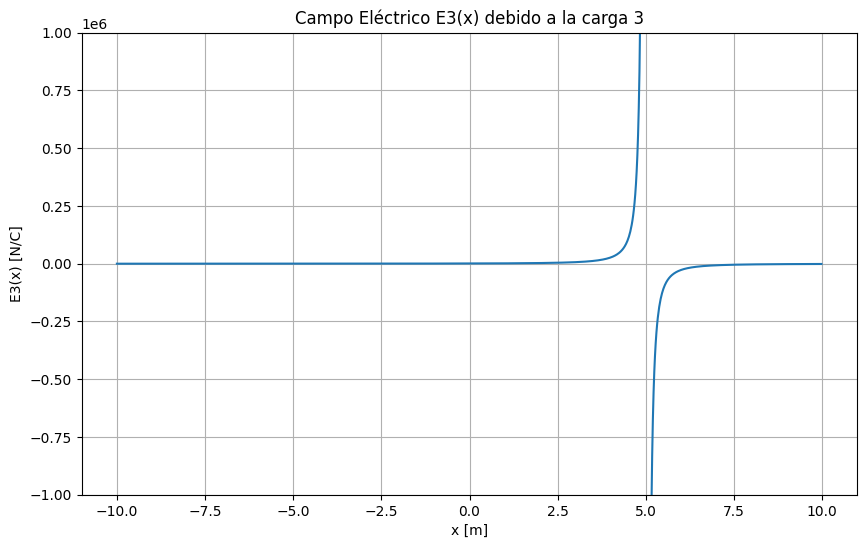

In [89]:
plt.figure(figsize=(10, 6))
plt.plot(x, Ex3[0, :])
plt.ylim(-1e6, 1e6)
plt.xlabel('x [m]')
plt.ylabel('E3(x) [N/C]')
plt.title('Campo Eléctrico E3(x) debido a la carga 3')
plt.grid()
plt.show()

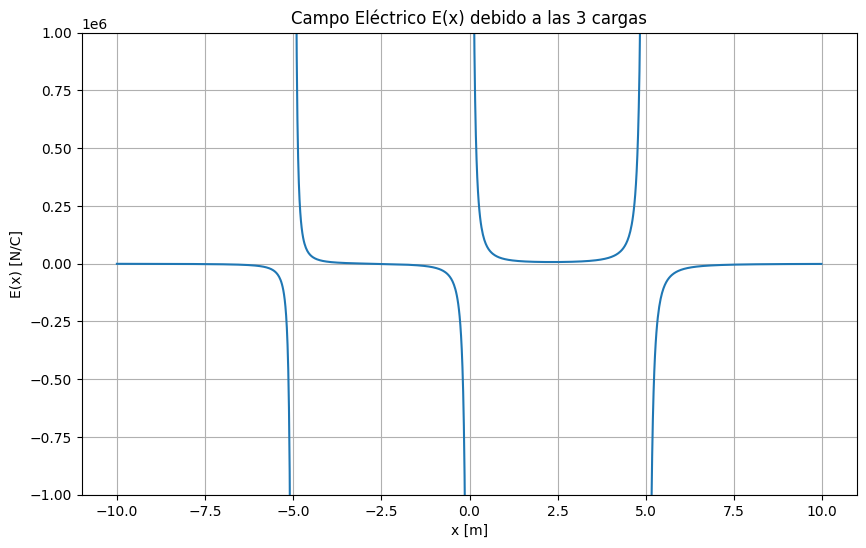

In [88]:
plt.figure(figsize=(10, 6))
plt.plot(x, x_axis_Ex[0, :])
plt.ylim(-1e6, 1e6)
plt.xlabel('x [m]')
plt.ylabel('E(x) [N/C]')
plt.title('Campo Eléctrico E(x) debido a las 3 cargas')
plt.grid()
plt.show()

In [72]:
def bisection(f, a, b, tolerance=1e-10, max_iter=1000000000):
    """ Método de la bisección para encontrar la raíz de f en el intervalo [a, b] """
    if f(a) * f(b) >= 0:
        raise ValueError("f(a) y f(b) deben tener signos opuestos")
    
    for _ in range(max_iter):
        c = (a + b) / 2
        if abs(f(c)) < tolerance or (b - a) / 2 < tolerance:
            return c
        if f(c) * f(a) < 0:
            b = c
        else:
            a = c
    return (a + b) / 2

In [73]:
def electric_field_x(q, xq, x):
    """ calcula el campo eléctrico en x debido a cargas q en posiciones xq """
    Ex = 0
    for qi, xqi in zip(q, xq):
        dx = x - xqi
        Ex += qi * dx / abs(dx)**3
    Ex *= k
    return Ex

root = bisection(lambda x: electric_field_x(q, xq, x), -4, -1)
print(f"El campo eléctrico es cero cerca de x = {root}")

El campo eléctrico es cero cerca de x = -2.7977074333757628


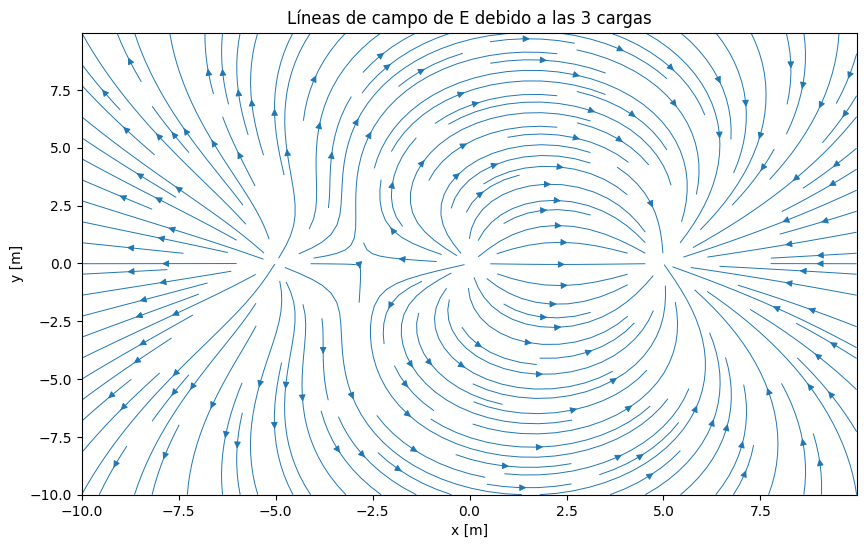

In [87]:
plt.figure(figsize=(10, 6))
plt.streamplot(X, Y, Ex, Ey, density=1.5, linewidth=0.7)
plt.title("Líneas de campo de E debido a las 3 cargas")
plt.xlabel("x [m]")
plt.ylabel("y [m]")
plt.show()

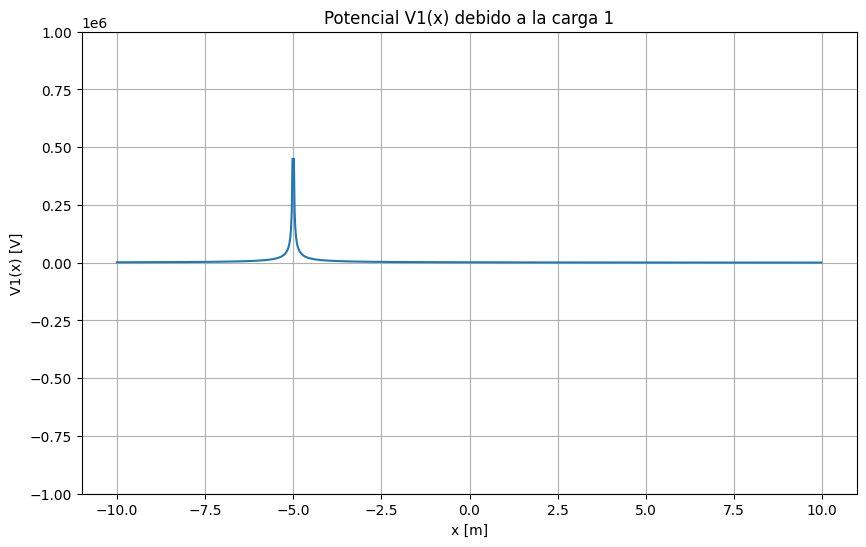

In [86]:
plt.figure(figsize=(10, 6))
plt.plot(x, V1[0, :])
plt.ylim(-1e6, 1e6)
plt.xlabel('x [m]')
plt.ylabel('V1(x) [V]')
plt.title('Potencial V1(x) debido a la carga 1')
plt.grid()
plt.show()

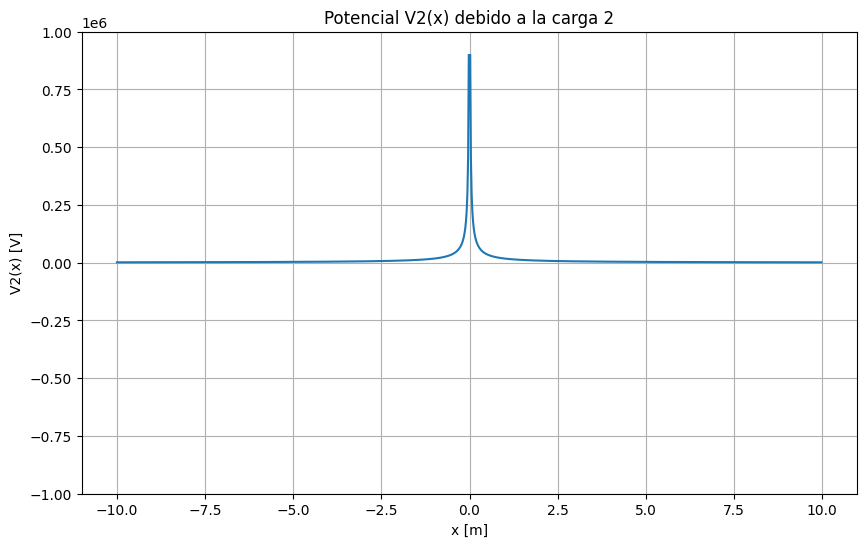

In [85]:
plt.figure(figsize=(10, 6))
plt.plot(x, V2[0, :])
plt.ylim(-1e6, 1e6)
plt.xlabel('x [m]')
plt.ylabel('V2(x) [V]')
plt.title('Potencial V2(x) debido a la carga 2')
plt.grid()
plt.show()

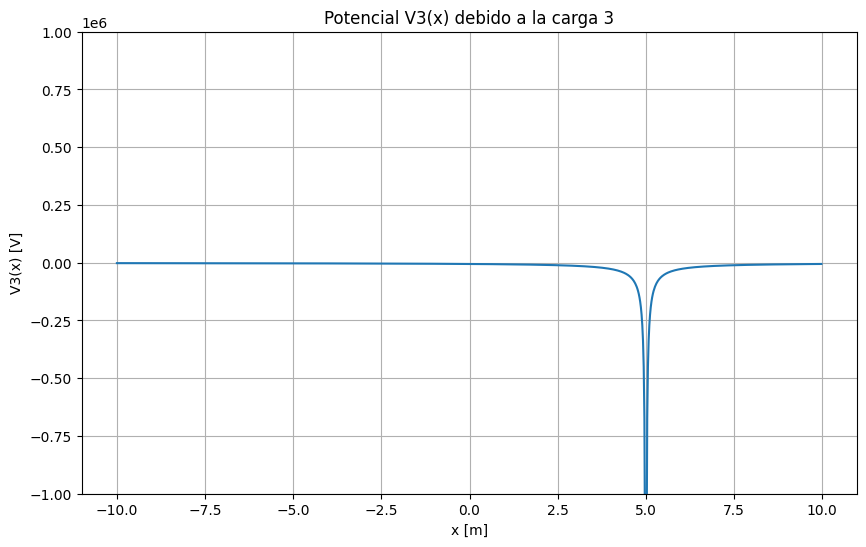

In [84]:
plt.figure(figsize=(10, 6))
plt.plot(x, V3[0, :])
plt.ylim(-1e6, 1e6)
plt.xlabel('x [m]')
plt.ylabel('V3(x) [V]')
plt.title('Potencial V3(x) debido a la carga 3')
plt.grid()
plt.show()

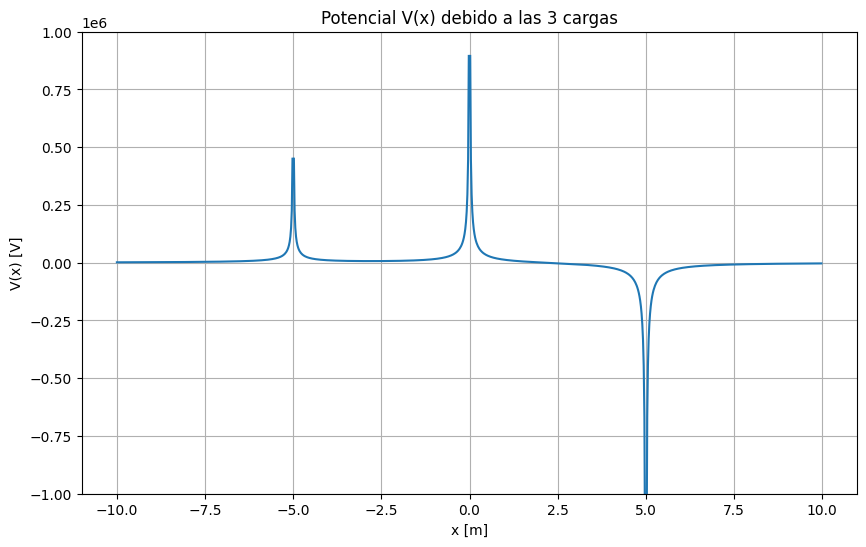

In [82]:
plt.figure(figsize=(10, 6))
plt.plot(x, x_axis_V[0, :])
plt.ylim(-1e6, 1e6)
plt.xlabel('x [m]')
plt.ylabel('V(x) [V]')
plt.title('Potencial V(x) debido a las 3 cargas')
plt.grid()
plt.show()

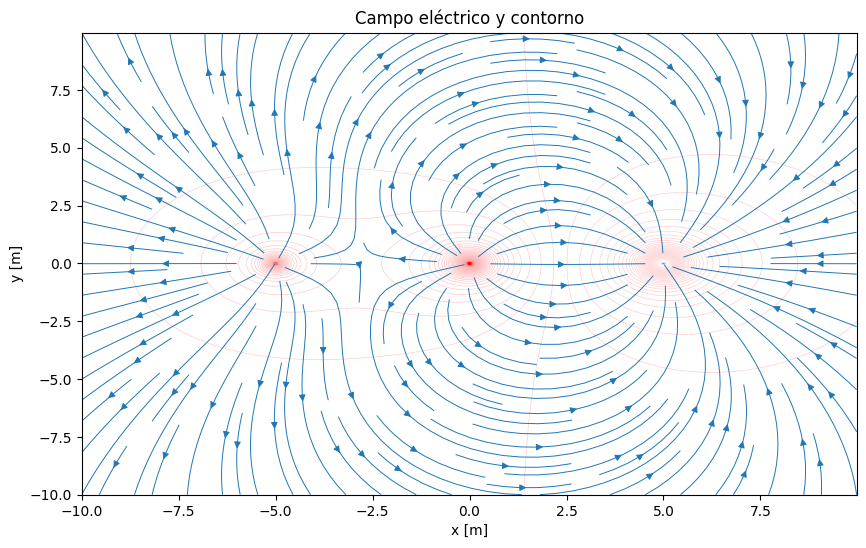

In [83]:
plt.figure(figsize=(10, 6))
plt.contour(X, Y, V, levels=1000, linewidths=0.5, cmap='bwr')
plt.streamplot(X, Y, Ex, Ey, density=1.5, linewidth=0.7)
plt.title("Campo eléctrico y contorno")
plt.xlabel("x [m]")
plt.ylabel("y [m]")
plt.show()